In [1]:
# Lending club case study

In [3]:
# Problem Statement and Goals - Identify key variables influencing loan defaults. This in turn will help make informed decisions and reduce financial risks

In [5]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Data Loading - Load the dataset
loan_data = pd.read_csv('C:/Users/anand/Desktop/Lending_Club_Case_Study/loan.csv')

C:\Users\anand\AppData\Local\Temp\ipykernel_32740\1848076710.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv('C:/Users/anand/Desktop/Lending_Club_Case_Study/loan.csv')


In [15]:
#Setting low_memory=False so as to ensures that pandas loads the data in chunks and infers data types more reliably
loan_data = pd.read_csv('C:/Users/anand/Desktop/Lending_Club_Case_Study/loan.csv', low_memory=False)

In [17]:
# Display the first few rows of the dataset
loan_data.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [19]:
#Check the shape and info of loan_data
loan_data.shape

(39717, 111)

In [21]:
# Identifying the null values in all columns
loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [23]:
# Identifying the columns where the null value count is greater that zero
loan_data.isnull().sum()[loan_data.isnull().sum() > 0 ]

emp_title                      2459
emp_length                     1075
desc                          12942
title                            11
mths_since_last_delinq        25682
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 68, dtype: int64

In [33]:
# 54 columns have only NaN values for all records and hence dropping them
# Drop all columns where all the values are NaN
loan_data = loan_data.dropna(axis=1, how='all')

In [35]:
loan_data.shape

(39717, 57)

In [37]:
# Identifying the columns where the null value count is greater that zero in the new data frame
loan_data.isnull().sum()[loan_data_clean.isnull().sum() > 0 ]

emp_title                      2459
emp_length                     1075
desc                          12942
title                            11
mths_since_last_delinq        25682
mths_since_last_record        36931
revol_util                       50
last_pymnt_d                     71
next_pymnt_d                  38577
last_credit_pull_d                2
collections_12_mths_ex_med       56
chargeoff_within_12_mths         56
pub_rec_bankruptcies            697
tax_liens                        39
dtype: int64

In [41]:
# Drop columns where the number of null values exceeds 60% of the total records
loan_data = loan_data_clean.dropna(axis=1, thresh=(0.6*len(loan_data)))

In [43]:
loan_data.shape

(39717, 54)

In [45]:
# Identifying the columns where the null value count is still greater that zero
loan_data.isnull().sum()[loan_data_clean.isnull().sum() > 0 ]

emp_title                      2459
emp_length                     1075
desc                          12942
title                            11
revol_util                       50
last_pymnt_d                     71
last_credit_pull_d                2
collections_12_mths_ex_med       56
chargeoff_within_12_mths         56
pub_rec_bankruptcies            697
tax_liens                        39
dtype: int64

In [49]:
# Exploring emp_title column
loan_data.emp_title.value_counts()

emp_title
US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Community College of Philadelphia      1
AMEC                                   1
lee county sheriff                     1
Bacon County Board of Education        1
Evergreen Center                       1
Name: count, Length: 28820, dtype: int64

In [51]:
# Count of unique values in emp_tile excluding NaN values
loan_data['emp_title'].nunique()

28820

In [53]:
#Large no of unique values - even if treated is going to add any value or help us uncover any patterns

In [55]:
# Exploring terms column
loan_data.term.value_counts()

term
36 months    29096
60 months    10621
Name: count, dtype: int64

In [57]:
# There are 2 types of tenure viz. 36 months and 60 months

In [63]:
loan_data.term.isnull().sum()

0

In [61]:
#There are no null values in the column term

In [69]:
# Exploring int_rate column
loan_data.int_rate.value_counts()

int_rate
10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
18.36%      1
16.96%      1
16.15%      1
16.01%      1
17.44%      1
Name: count, Length: 371, dtype: int64

In [71]:
# Remove the percentage sign from int_rate and convert to numeric
loan_data['int_rate_num'] = loan_data['int_rate'].str.replace('%', '').astype(float)

# Display the first few rows to verify
loan_data[['int_rate', 'int_rate_num']].head()

,int_rate,int_rate_num
0,10.65%,10.65
1,15.27%,15.27
2,15.96%,15.96
3,13.49%,13.49
4,12.69%,12.69


In [73]:
loan_data.int_rate_num.dtype

dtype('float64')

In [75]:
loan_data.int_rate_num.value_counts()

int_rate_num
10.99    956
13.49    826
11.49    825
7.51     787
7.88     725
        ... 
18.36      1
16.96      1
16.15      1
16.01      1
17.44      1
Name: count, Length: 371, dtype: int64

In [77]:
# Define bins and labels for bucketing
bins = [0, 5, 10, 15, 20, 25] # bin edges
labels = ['0-5', '5-10', '10-15', '15-20', '20-25'] # Bucket labels

# Create the bucketized column
loan_data['int_rate_bucket'] = pd.cut(loan_data['int_rate_num'], bins=bins, labels=labels, right=False)
# Display the first few rows to verify
loan_data[['int_rate', 'int_rate_num', 'int_rate_bucket']].head()

,int_rate,int_rate_num,int_rate_bucket
0,10.65%,10.65,10-15
1,15.27%,15.27,15-20
2,15.96%,15.96,15-20
3,13.49%,13.49,10-15
4,12.69%,12.69,10-15


In [79]:
loan_data.int_rate_bucket.value_counts()

int_rate_bucket
10-15    19045
5-10     12142
15-20     7658
20-25      872
0-5          0
Name: count, dtype: int64

In [83]:
loan_data.loan_amnt.value_counts()

loan_amnt
10000    2833
12000    2334
5000     2051
6000     1908
15000    1895
         ... 
22875       1
8175        1
19475       1
21225       1
22550       1
Name: count, Length: 885, dtype: int64

In [85]:
# Create Buckets for Loan Amount
bins = [0, 5000, 10000, 15000, 20000, 25000, 35000]
labels = ['0-5K', '5K-10K', '10K-15K', '15K-20K', '20K-25K', '25K+']
loan_data['loan_amnt_bucket'] = pd.cut(loan_data['loan_amnt'], bins=bins, labels=labels, include_lowest=True)

In [87]:
loan_data.loan_amnt_bucket.head()

0      0-5K
1      0-5K
2      0-5K
3    5K-10K
4      0-5K
Name: loan_amnt_bucket, dtype: category
Categories (6, object): ['0-5K' < '5K-10K' < '10K-15K' < '15K-20K' < '20K-25K' < '25K+']

In [107]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,int_rate_num,int_rate_bucket,loan_amnt_bucket
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,1,INDIVIDUAL,0,0.0,0,0.0,0.0,10.65,10-15,0-5K
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1,INDIVIDUAL,0,0.0,0,0.0,0.0,15.27,15-20,0-5K
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,1,INDIVIDUAL,0,0.0,0,0.0,0.0,15.96,15-20,0-5K
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,1,INDIVIDUAL,0,0.0,0,0.0,0.0,13.49,10-15,5K-10K
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,1,INDIVIDUAL,0,0.0,0,0.0,0.0,12.69,10-15,0-5K


In [111]:
loan_data.shape

(39717, 57)

<function matplotlib.pyplot.show(close=None, block=None)>

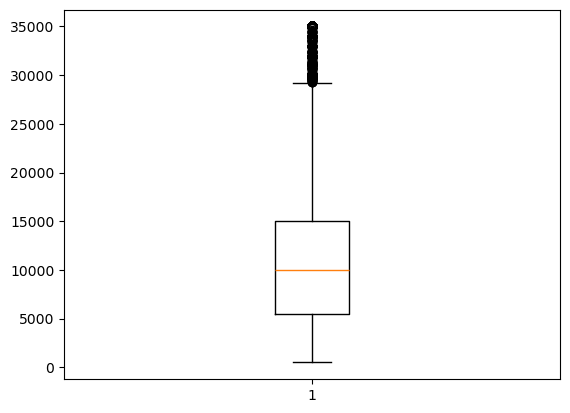

In [113]:
#checking for outliers in loan Amount
plt.boxplot(loan_data.loan_amnt)
plt.show

In [121]:
loan_data.shape

(39717, 57)

In [139]:
loan_data = loan_data[loan_data.loan_amnt < 29500]
loan_data.shape

(38491, 57)

<function matplotlib.pyplot.show(close=None, block=None)>

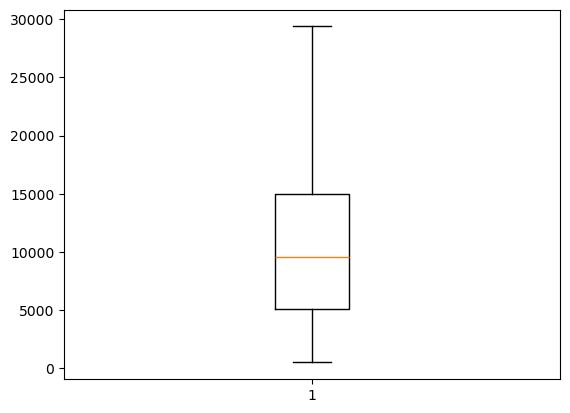

In [141]:
#checking for outliers in loan Amount
plt.boxplot(loan_data.loan_amnt)
plt.show

In [143]:
loan_data.loan_amnt.describe()

count    38491.000000
mean     10523.702294
std       6443.601034
min        500.000000
25%       5125.000000
50%       9600.000000
75%      15000.000000
max      29375.000000
Name: loan_amnt, dtype: float64

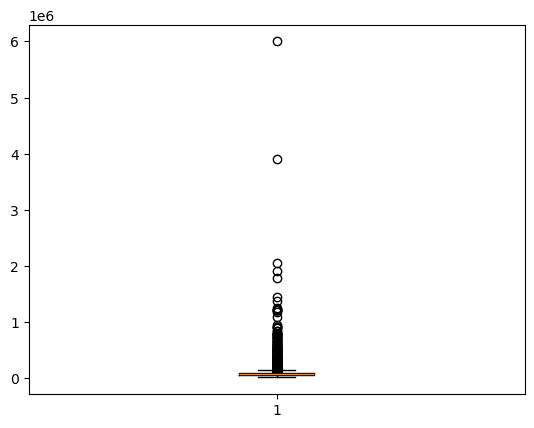

In [149]:
#checking for outliers in Anuual Income
plt.boxplot(loan_data.annual_inc)
plt.show()

In [151]:
loan_data.annual_inc.shape

(38491,)

In [163]:
pd.options.display.float_format = '{:,.2f}'.format
loan_data.annual_inc.describe()

count      38,491.00
mean       67,216.38
std        62,505.15
min         4,000.00
25%        40,000.00
50%        57,500.00
75%        80,000.00
max     6,000,000.00
Name: annual_inc, dtype: float64

In [173]:
loan_data[loan_data.annual_inc > 1000000]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,int_rate_num,int_rate_bucket,loan_amnt_bucket
7247,884755,1100269,12025,12025,"12,000.00",36 months,14.27%,412.57,C,C2,...,1,INDIVIDUAL,0,0.00,0,0.00,0.00,14.27,10-15,10K-15K
10621,830027,1039166,15775,15775,"15,750.00",60 months,12.99%,358.85,C,C1,...,1,INDIVIDUAL,0,0.00,0,0.00,0.00,12.99,10-15,15K-20K
21412,643368,823374,10000,10000,"9,500.00",36 months,6.54%,306.68,A,A4,...,1,INDIVIDUAL,0,0.00,0,0.00,0.00,6.54,5-10,5K-10K
23551,611872,784585,1500,1500,"1,500.00",36 months,6.17%,45.75,A,A3,...,1,INDIVIDUAL,0,0.00,0,0.00,0.00,6.17,5-10,0-5K
24166,603818,774761,25000,25000,"24,493.46",60 months,15.20%,597.38,D,D4,...,1,INDIVIDUAL,0,0.00,0,0.00,0.00,15.20,15-20,20K-25K
25762,572697,736657,12000,12000,"12,000.00",36 months,7.51%,373.33,A,A4,...,1,INDIVIDUAL,0,0.00,0,0.00,0.00,7.51,5-10,10K-15K
27564,551367,710553,5600,5600,"5,600.00",60 months,13.61%,129.18,C,C2,...,1,INDIVIDUAL,0,0.00,0,0.00,0.00,13.61,10-15,5K-10K
28906,528009,682915,4500,4500,"4,500.00",60 months,7.88%,90.99,A,A5,...,1,INDIVIDUAL,0,0.00,0,0.00,0.00,7.88,5-10,0-5K
29639,519954,672152,25000,15500,"11,430.00",60 months,10.62%,334.08,B,B3,...,1,INDIVIDUAL,0,0.00,0,0.00,0.00,10.62,10-15,20K-25K
30107,513542,663575,5000,5000,"5,000.00",36 months,12.73%,167.84,C,C1,...,1,INDIVIDUAL,0,0.00,0,0.00,0.00,12.73,10-15,0-5K


In [201]:
loan_data = loan_data[loan_data.annual_inc < 120000]

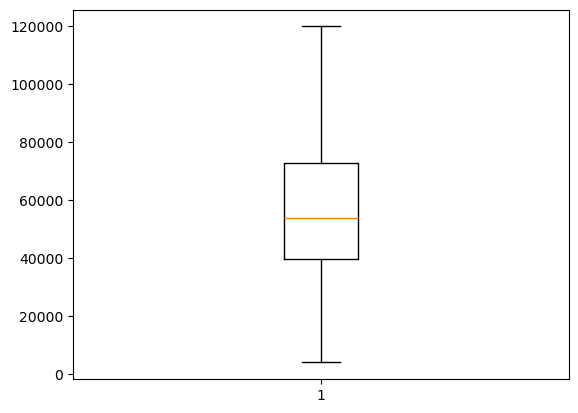

In [203]:
#checking for outliers in Anuual Income
plt.boxplot(loan_data.annual_inc)
plt.show()

In [205]:
loan_data.shape

(35194, 57)

In [211]:
loan_data.annual_inc.value_counts()

annual_inc
60,000.00    1482
50,000.00    1055
40,000.00     876
45,000.00     828
30,000.00     825
             ... 
63,360.00       1
16,884.00       1
61,838.40       1
57,739.00       1
27,376.00       1
Name: count, Length: 4629, dtype: int64

In [213]:
loan_data.annual_inc.describe()

count    35,194.00
mean     57,160.36
std      23,807.09
min       4,000.00
25%      39,562.50
50%      54,000.00
75%      73,000.00
max     119,976.00
Name: annual_inc, dtype: float64

In [215]:
# Creating buckets for annual income
# Define bins and labels for bucketing
bins = [0, 20000, 40000, 60000, 80000, 100000, 200000] # bin edges
labels = ['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000-100000', '100000-200000'] # Bucket labels

# Create the bucketized column
loan_data['annual_inc_bucket'] = pd.cut(loan_data['annual_inc'], bins=bins, labels=labels, right=False)
# Display the first few rows to verify
loan_data[['annual_inc', 'annual_inc_bucket']].head()

,annual_inc,annual_inc_bucket
0,"24,000.00",20000-40000
1,"30,000.00",20000-40000
2,"12,252.00",0-20000
3,"49,200.00",40000-60000
4,"80,000.00",80000-100000


In [217]:
loan_data.annual_inc_bucket.value_counts()

annual_inc_bucket
40000-60000      10934
60000-80000       8457
20000-40000       7934
80000-100000      4568
100000-200000     2235
0-20000           1066
Name: count, dtype: int64

In [219]:
loan_data.shape

(35194, 58)

In [221]:
# Define bins and labels for bucketing of DTI
bins = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30] # bin edges
labels = ['0-2', '2-4', '4-6', '6-8', '8-10', '10-12', '12-14', '14-16', '16-18', '18-20', '20-22', '22-24', '24-26', '26-28', '28-30'] # Bucket labels

# Create the bucketized column
loan_data['dti_bucket'] = pd.cut(loan_data['dti'], bins=bins, labels=labels, right=False)
# Display the first few rows to verify
loan_data[['dti','dti_bucket']].head()

,dti,dti_bucket
0,27.65,26-28
1,1.00,0-2
2,8.72,8-10
3,20.00,20-22
4,17.94,16-18


In [227]:
# Exploring int_rate column
loan_data.int_rate_bucket.value_counts()

int_rate_bucket
10-15    17064
5-10     11093
15-20     6469
20-25      568
0-5          0
Name: count, dtype: int64

In [229]:
loan_data.shape

(35194, 59)

In [231]:
loan_data.int_rate_bucket.isnull().sum()

0

In [233]:
# No null values in int_rate_bucket column

In [239]:
# Exploring grade column
loan_data.grade.value_counts()

grade
B    10769
A     9226
C     7275
D     4679
E     2252
F      777
G      216
Name: count, dtype: int64

In [243]:
loan_data.grade.isnull().sum()

0

<function matplotlib.pyplot.show(close=None, block=None)>

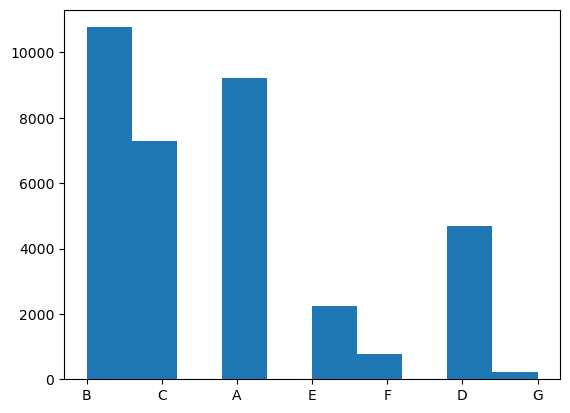

In [237]:
plt.hist(loan_data.grade)
plt.show

In [245]:
# Exploring sub_grade column
loan_data.sub_grade.value_counts()

sub_grade
A4    2638
B3    2545
A5    2496
B5    2440
B4    2254
C1    1914
B2    1865
C2    1795
A3    1672
B1    1665
C3    1383
A2    1381
D2    1199
C4    1127
C5    1056
A1    1039
D3    1038
D4     861
D1     833
D5     748
E1     622
E2     534
E3     445
E4     359
E5     292
F1     238
F2     189
F3     140
F4     129
F5      81
G1      73
G2      55
G3      34
G4      34
G5      20
Name: count, dtype: int64

In [247]:
loan_data_clean.sub_grade.isnull().sum()

0

In [251]:
# Checking null values in emp_length column
loan_data.emp_length.isnull().sum()

1026

In [253]:
# Eliminating records with null values for emp_lenght field
loan_data = loan_data[~loan_data.emp_length.isnull()]

In [255]:
loan_data.isnull().sum()[loan_data.isnull().sum() > 0 ]

emp_title                      1134
desc                          10988
title                            10
revol_util                       45
last_pymnt_d                     63
last_credit_pull_d                1
collections_12_mths_ex_med       41
chargeoff_within_12_mths         41
pub_rec_bankruptcies            630
tax_liens                        27
dtype: int64

In [261]:
# Eliminating records with null values for fields - emp_title, title, revol_util, last_paymnt_d, last_credit_pull_d, collections_12_mths_ex_med, chargeoff_within_12_mths, pub_rec_bankruptcies, pub_rec_bankruptcies, tax liens
# Leaving the field desc as it will lead to a large no of records getting deleted
# Define the columns to check for null values
fields_to_check = [
    'emp_title', 'title', 'revol_util', 'last_pymnt_d', 'last_credit_pull_d',
    'collections_12_mths_ex_med', 'chargeoff_within_12_mths',
    'pub_rec_bankruptcies', 'tax_liens'
]
# Drop rows with null values in the specified fields
loan_data = loan_data.dropna(subset=fields_to_check)
# Print the shape of the DataFrame after elimination
loan_data.shape

(32327, 59)

In [263]:
loan_data.isnull().sum()[loan_data.isnull().sum() > 0 ]

desc    10631
dtype: int64

In [265]:
#Analyzing the values in emp_lenght column
loan_data['emp_length'].value_counts()

emp_length
10+ years    7024
2 years      3810
< 1 year     3688
3 years      3517
4 years      2984
5 years      2802
1 year       2766
6 years      1917
7 years      1532
8 years      1222
9 years      1065
Name: count, dtype: int64

In [269]:
# Remove 'years', 'year', '<', and '+' signs and convert to numeric
# Ensure emp_length is treated as a string, then clean and convert to numeric
loan_data['emp_length'] = (
    loan_data['emp_length']
    .astype(str)                          # Convert all values to string
    .str.replace('years', '', regex=False)  # Remove 'years'
    .str.replace('year', '', regex=False)  # Remove 'year'
    .str.replace('<', '', regex=False)     # Remove '<'
    .str.replace('+', '', regex=False)     # Remove '+'
    .str.strip()                           # Remove any leading/trailing spaces
    .replace('n/a', None)                  # Replace 'n/a' with NaN if present
    .astype(float)                         # Convert to numeric type
)

# Display the first few rows to verify
print(loan_data[['emp_length']].head())

   emp_length
1        1.00
3       10.00
4        1.00
5        3.00
6        8.00


In [271]:
loan_data['emp_length'].value_counts()

emp_length
10.00    7024
1.00     6454
2.00     3810
3.00     3517
4.00     2984
5.00     2802
6.00     1917
7.00     1532
8.00     1222
9.00     1065
Name: count, dtype: int64

In [273]:
loan_data.loan_amnt_bucket.value_counts()

loan_amnt_bucket
5K-10K     11165
0-5K        8219
10K-15K     6795
15K-20K     3748
20K-25K     2118
25K+         282
Name: count, dtype: int64

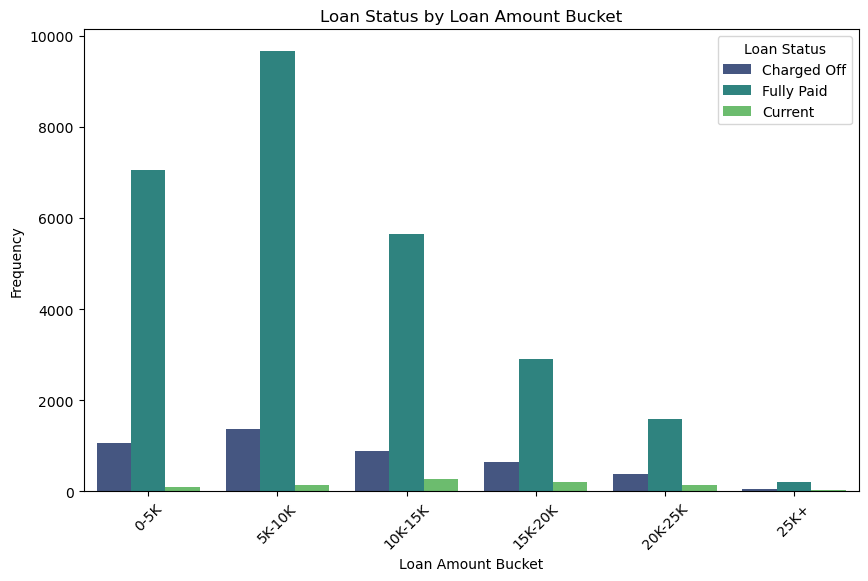

In [275]:
# Understanding the impact of Loan Amount Bucket on Loan Status
plt.figure(figsize=(10, 6))
sns.countplot(data=loan_data, x='loan_amnt_bucket', hue='loan_status', palette='viridis')
plt.title('Loan Status by Loan Amount Bucket')
plt.xlabel('Loan Amount Bucket')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')
plt.show()

In [281]:
# Finding # 1
# The 'Loan Amount Bucket' of 5K - 10K have highest 'Charged Off' loans
# The absolute no's of "Charged Off" loans gradually fall as we go to higher "Loan Amount Buckets"

C:\Users\anand\AppData\Local\Temp\ipykernel_32740\1367844268.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bucket_status = loan_data.groupby(['loan_amnt_bucket', 'loan_status']).size().unstack(fill_value=0)


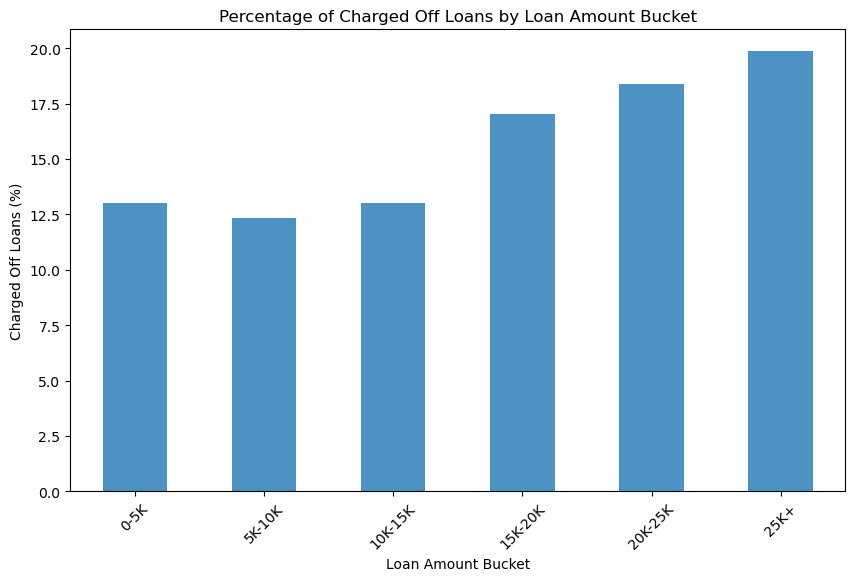

In [285]:
# Understanding the impact of Loan Amount Bucket on Loan Status
# Charged Off Loans as a Percentage of total loans for the said Loan Amount bucket

bucket_status = loan_data.groupby(['loan_amnt_bucket', 'loan_status']).size().unstack(fill_value=0)
bucket_status['Total'] = bucket_status.sum(axis=1)
bucket_status['Charged_Off_Percent'] = (bucket_status.get('Charged Off', 0) / bucket_status['Total']) * 100

# Plot the Percentage of Charged Off Loans by Loan Amount Bucket
plt.figure(figsize=(10, 6))
bucket_status['Charged_Off_Percent'].plot(kind='bar', alpha=0.8)
plt.title('Percentage of Charged Off Loans by Loan Amount Bucket')
plt.xlabel('Loan Amount Bucket')
plt.ylabel('Charged Off Loans (%)')
plt.xticks(rotation=45)
plt.show()

In [287]:
# Finding # 2
# Whereas the absolute no of "Charged Off" loans are highest in the 'Loan Amount Bucket' of 5K - 10K and then gradually decline as we go up.
# However when expressed as a percentage - "Charged Off" loans as a percentage of total loans in the respective Loan Amount Bucket - 
    # The percentage of Charged Off Loans go up as the the Loan Amount Bucket increases

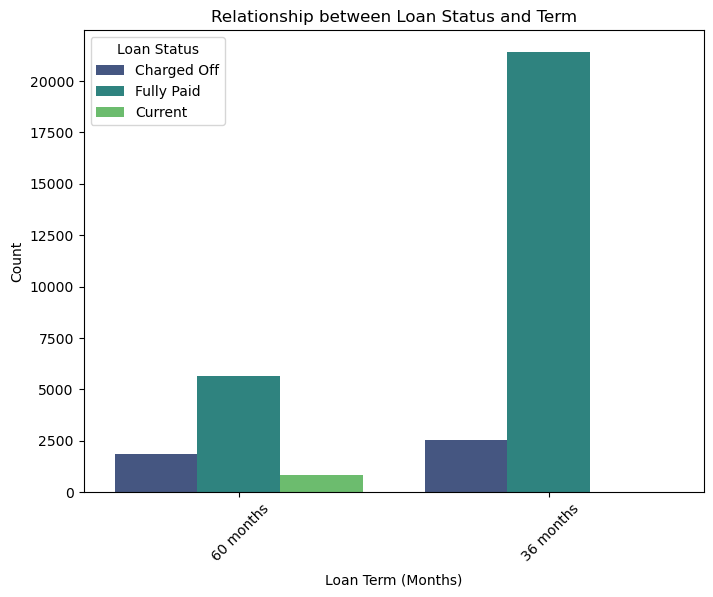

In [293]:
# Understanding the impact of Term on Loan Status
plt.figure(figsize=(8, 6))
sns.countplot(data=loan_data, x='term', hue='loan_status', palette='viridis')
plt.title('Relationship between Loan Status and Term')
plt.xlabel('Loan Term (Months)')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.xticks(rotation=45)
plt.show()

In [295]:
# Finding # 3
# Given the larger base the high abosolute no's are experinced for Charged Off Loans in lower loan tenure i.e. 36 months
# However "Charged Off" loans as a percentage of total loans for the respective tenures are higher for higher tenures i.e. in 60 months tenure

In [297]:
# Understanding the impact of Interest Rates on Loan Status
# Create a pivot table between Interest Rate Bucket and loan status and store the result
res_1 = pd.pivot_table(
    data=loan_data, 
    index='int_rate_bucket', 
    columns='loan_status', 
    values='id', 
    aggfunc='count',
    fill_value=0,  # Replace NaN with 0
    observed=False
)

# Display the Pivot Table
print(res_1)

loan_status      Charged Off  Current  Fully Paid
int_rate_bucket                                  
0-5                        0        0           0
5-10                     631       63        9305
10-15                   2189      396       13128
15-20                   1402      343        4333
20-25                    194       55         288


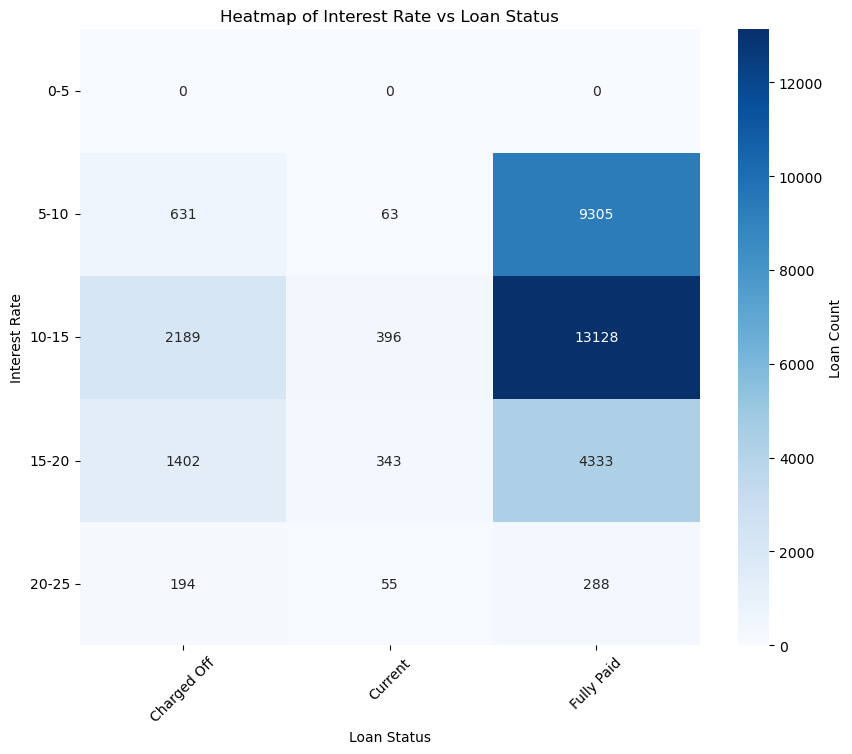

In [299]:
# Create a heatmap between Interest Rate and Loan Status
plt.figure(figsize=(10, 8))
sns.heatmap(
    res_1, 
    cmap='Blues', 
    annot=True,  # Enable annotations
    fmt='g',     # Use standard numeric format instead of scientific notation
    cbar_kws={'label': 'Loan Count'}  # Label for color bar
)
plt.title('Heatmap of Interest Rate vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)   # Keep y-axis labels horizontal
plt.show()

In [303]:
# Finding # 4
# Percentage of Charged Off loans increases as the Interest Rate increases.

In [305]:
# Understanding the impact of Grade on Loan Status
# Create a pivot table between Grade and loan Status and store the result
res_2 = pd.pivot_table(
    data=loan_data, 
    index='grade', 
    columns='loan_status', 
    values='id', 
    aggfunc='count',
    fill_value=0,  # Replace NaN with 0
    observed=False
)

# Display the Pivot Table
print(res_2)

loan_status  Charged Off  Current  Fully Paid
grade                                        
A                    493       34        7868
B                   1156      255        8517
C                   1086      208        5382
D                    875      180        3250
E                    521      132        1448
F                    214       37         468
G                     71       11         121


       charged_off_loans  total_loans  charged_off_percentage
grade                                                        
A                    493         8395                    5.87
B                   1156         9928                   11.64
C                   1086         6676                   16.27
D                    875         4305                   20.33
E                    521         2101                   24.80
F                    214          719                   29.76
G                     71          203                   34.98


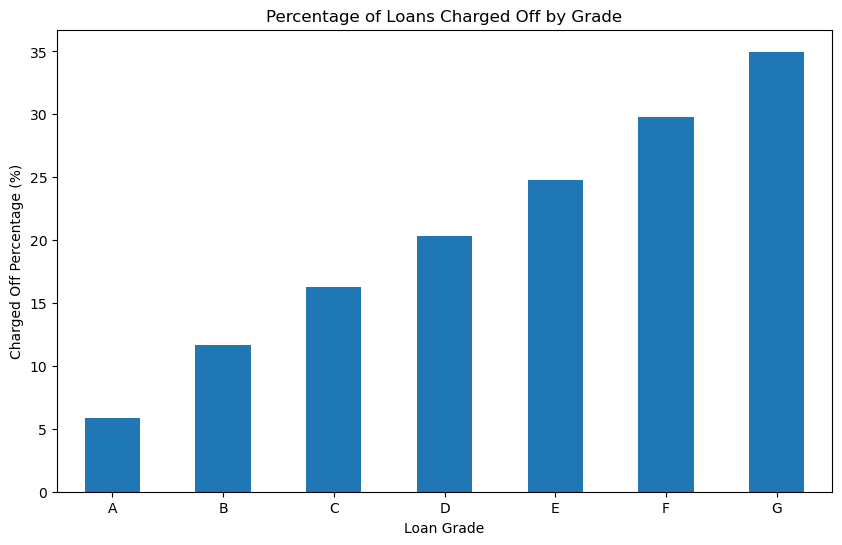

In [307]:
# Create a pivot table to calculate total loans by grade
total_loans = pd.pivot_table(
    data=loan_data,
    index='grade',
    values='id',
    aggfunc='count'
).rename(columns={'id': 'total_loans'})

# Create a pivot table to calculate charged off loans by grade
charged_off_loans = pd.pivot_table(
    data=loan_data[loan_data['loan_status'] == 'Charged Off'],
    index='grade',
    values='id',
    aggfunc='count'
).rename(columns={'id': 'charged_off_loans'})

# Combine the two tables
percentage_pivot = charged_off_loans.join(total_loans)

# Calculate the percentage of charged off loans
percentage_pivot['charged_off_percentage'] = (
    (percentage_pivot['charged_off_loans'] / percentage_pivot['total_loans']) * 100
).round(2)

# Display the Pivot Table
print(percentage_pivot)

# Visualize the results
plt.figure(figsize=(10, 6))
percentage_pivot['charged_off_percentage'].plot(kind='bar')
plt.title('Percentage of Loans Charged Off by Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Charged Off Percentage (%)')
plt.xticks(rotation=0)
plt.show()

In [309]:
# Finding # 5
# Percentage of Charged Off loans increases as the Grade increases from 'A' to 'G'

            charged_off_loans  total_loans  charged_off_percentage
emp_length                                                        
1.00                      865         6454                   13.40
2.00                      489         3810                   12.83
3.00                      469         3517                   13.34
4.00                      389         2984                   13.04
5.00                      375         2802                   13.38
6.00                      261         1917                   13.62
7.00                      223         1532                   14.56
8.00                      164         1222                   13.42
9.00                      134         1065                   12.58
10.00                    1047         7024                   14.91


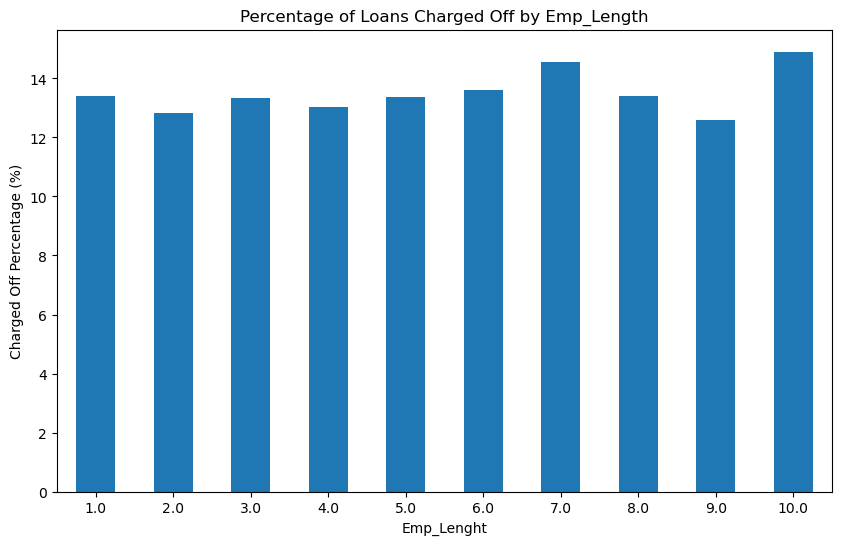

In [311]:
# Undestanding the relationship between emp_lenght and loan_status
# Create a pivot table to calculate total loans by emp_length
total_loans = pd.pivot_table(
    data=loan_data,
    index='emp_length',
    values='id',
    aggfunc='count'
).rename(columns={'id': 'total_loans'})

# Create a pivot table to calculate charged off loans by emp_length
charged_off_loans = pd.pivot_table(
    data=loan_data[loan_data['loan_status'] == 'Charged Off'],
    index='emp_length',
    values='id',
    aggfunc='count'
).rename(columns={'id': 'charged_off_loans'})

# Combine the two tables
percentage_pivot = charged_off_loans.join(total_loans)

# Calculate the percentage of charged off loans
percentage_pivot['charged_off_percentage'] = (
    (percentage_pivot['charged_off_loans'] / percentage_pivot['total_loans']) * 100
).round(2)

# Display the Pivot Table
print(percentage_pivot)

# Visualize the results
plt.figure(figsize=(10, 6))
percentage_pivot['charged_off_percentage'].plot(kind='bar')
plt.title('Percentage of Loans Charged Off by Emp_Length')
plt.xlabel('Emp_Lenght')
plt.ylabel('Charged Off Percentage (%)')
plt.xticks(rotation=0)
plt.show()

In [313]:
# Finding # 6
# No clear evidence to suggest that emp_lenth has an impact on loans that are charged off

                charged_off_loans  total_loans  charged_off_percentage
home_ownership                                                        
MORTGAGE                     1719        13472                   12.76
OTHER                          17           86                   19.77
OWN                           321         2368                   13.56
RENT                         2359        16401                   14.38


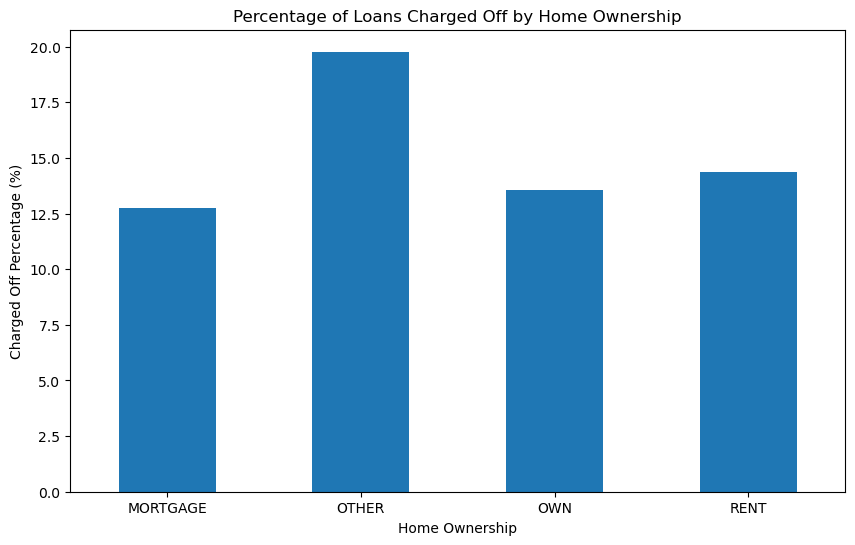

In [315]:
# Understanding the impact of home_ownership on loan_status
# Create a pivot table to calculate total loans by home_ownership
total_loans = pd.pivot_table(
    data=loan_data,
    index='home_ownership',
    values='id',
    aggfunc='count'
).rename(columns={'id': 'total_loans'})

# Create a pivot table to calculate charged off loans by grade
charged_off_loans = pd.pivot_table(
    data=loan_data[loan_data['loan_status'] == 'Charged Off'],
    index='home_ownership',
    values='id',
    aggfunc='count'
).rename(columns={'id': 'charged_off_loans'})

#Combine the two tables
percentage_pivot = charged_off_loans.join(total_loans)

#Calculate the percentage of charged off loans
percentage_pivot['charged_off_percentage'] = (
    (percentage_pivot['charged_off_loans'] / percentage_pivot['total_loans']) * 100
).round(2)

#Display the Pivot Table
print(percentage_pivot)

#Visualize the results
plt.figure(figsize=(10, 6))
percentage_pivot['charged_off_percentage'].plot(kind='bar')
plt.title('Percentage of Loans Charged Off by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Charged Off Percentage (%)')
plt.xticks(rotation=0)
plt.show()

In [323]:
# Finding # 7
# No clear evidence to suggest that home_ownership has an impact on loans that are charged off

C:\Users\anand\AppData\Local\Temp\ipykernel_32740\2424161880.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  total_loans = pd.pivot_table(
C:\Users\anand\AppData\Local\Temp\ipykernel_32740\2424161880.py:12: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  charged_off_loans = pd.pivot_table(


                   charged_off_loans  total_loans  charged_off_percentage
annual_inc_bucket                                                        
0-20000                          155          785                   19.75
20000-40000                     1172         7057                   16.61
40000-60000                     1459        10165                   14.35
60000-80000                     1003         7909                   12.68
80000-100000                     453         4325                   10.47
100000-200000                    174         2086                    8.34


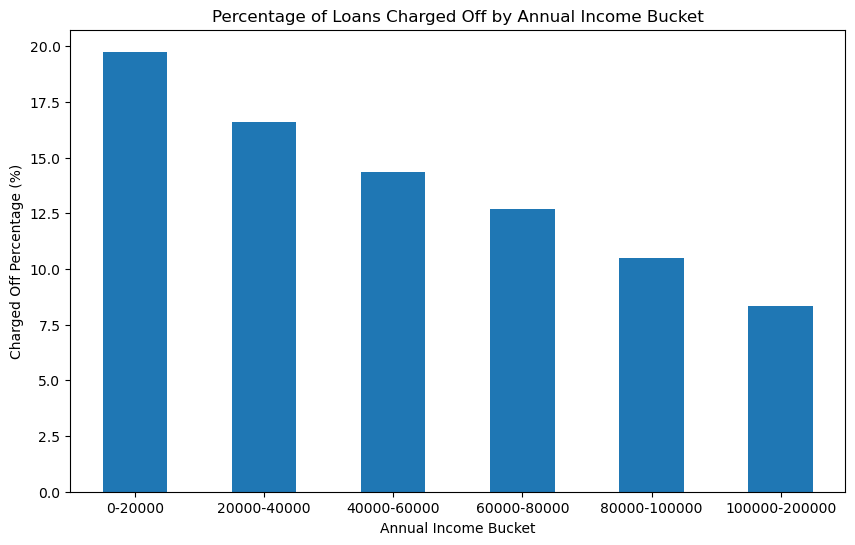

In [325]:
# Relationship between loan_status and Annual Income Bucket

# Create a pivot table to calculate total loans by annual_inc_bucket
total_loans = pd.pivot_table(
    data=loan_data,
    index='annual_inc_bucket',
    values='id',
    aggfunc='count'
).rename(columns={'id': 'total_loans'})

# Create a pivot table to calculate charged off loans by annual_inc_bucket
charged_off_loans = pd.pivot_table(
    data=loan_data[loan_data['loan_status'] == 'Charged Off'],
    index='annual_inc_bucket',
    values='id',
    aggfunc='count'
).rename(columns={'id': 'charged_off_loans'})

# Combine the two tables
percentage_pivot = charged_off_loans.join(total_loans)

# Calculate the percentage of charged off loans
percentage_pivot['charged_off_percentage'] = (
    (percentage_pivot['charged_off_loans'] / percentage_pivot['total_loans']) * 100
).round(2)

# Display the Pivot Table
print(percentage_pivot)

# Visualize the results
plt.figure(figsize=(10, 6))
percentage_pivot['charged_off_percentage'].plot(kind='bar')
plt.title('Percentage of Loans Charged Off by Annual Income Bucket')
plt.xlabel('Annual Income Bucket')
plt.ylabel('Charged Off Percentage (%)')
plt.xticks(rotation=0)
plt.show()

In [327]:
# Finding # 8
# Annual Income has a very significant impact on the Charged Off Loan
# We experience high Charged Off loans in lower Annual Income brackets and they go down significantly as the Annual Income increases

                    charged_off_loans  total_loans  charged_off_percentage
purpose                                                                   
car                               144         1353                   10.64
credit_card                       426         4191                   10.16
debt_consolidation               2241        15584                   14.38
educational                        43          258                   16.67
home_improvement                  250         2148                   11.64
house                              40          288                   13.89
major_purchase                    178         1815                    9.81
medical                            86          565                   15.22
moving                             76          475                   16.00
other                             497         3274                   15.18
renewable_energy                   14           76                   18.42
small_business           

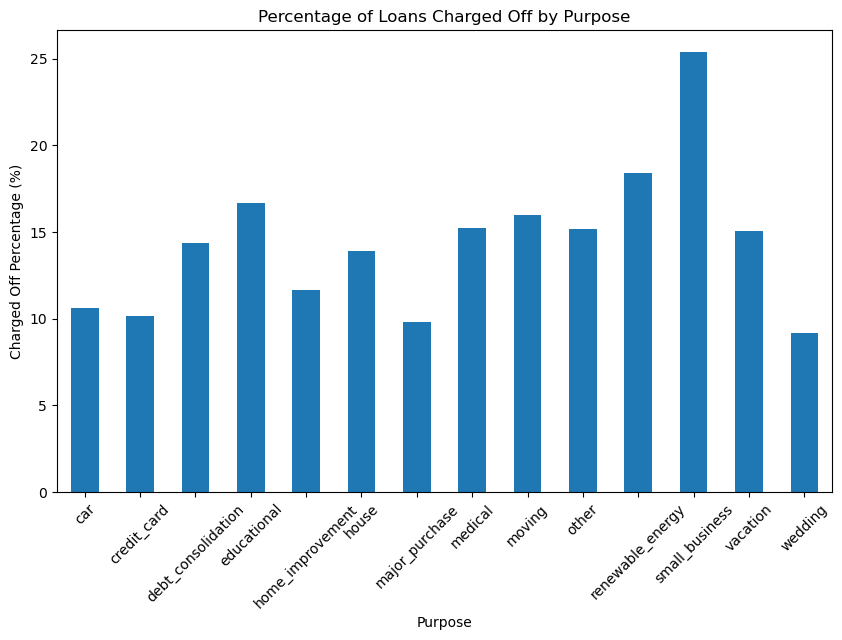

In [329]:
# Relationship between loan_status and Purpose
# Create a pivot table to calculate total loans by Purpose
total_loans = pd.pivot_table(
    data=loan_data,
    index='purpose',
    values='id',
    aggfunc='count'
).rename(columns={'id': 'total_loans'})

# Create a pivot table to calculate charged off loans by annual_inc_bucket
charged_off_loans = pd.pivot_table(
    data=loan_data[loan_data['loan_status'] == 'Charged Off'],
    index='purpose',
    values='id',
    aggfunc='count'
).rename(columns={'id': 'charged_off_loans'})

# Combine the two tables
percentage_pivot = charged_off_loans.join(total_loans)

# Calculate the percentage of charged off loans
percentage_pivot['charged_off_percentage'] = (
    (percentage_pivot['charged_off_loans'] / percentage_pivot['total_loans']) * 100
).round(2)

# Display the Pivot Table
print(percentage_pivot)

# Visualize the results
plt.figure(figsize=(10, 6))
percentage_pivot['charged_off_percentage'].plot(kind='bar')
plt.title('Percentage of Loans Charged Off by Purpose')
plt.xlabel('Purpose')
plt.ylabel('Charged Off Percentage (%)')
plt.xticks(rotation=45)
plt.show()

In [333]:
# Finding # 9
# Charged off loans as a percentage of Total Loans is highest where the purpose of the loan is for Small Business

            charged_off_loans  total_loans  charged_off_percentage
addr_state                                                        
AK                         13           61                   21.31
AL                         40          375                   10.67
AR                         23          209                   11.00
AZ                         99          700                   14.14
CA                        856         5697                   15.03
CO                         73          638                   11.44
CT                         70          584                   11.99
DC                         10          174                    5.75
DE                         11           96                   11.46
FL                        396         2375                   16.67
GA                        177         1145                   15.46
HI                         25          144                   17.36
IL                        175         1271                   1

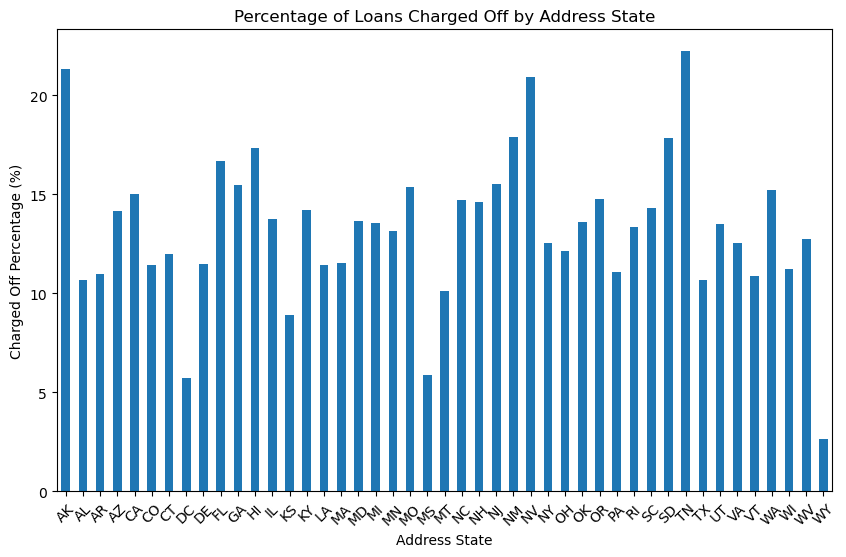

In [335]:
# Relationship between loan_status and Address State
# Create a pivot table to calculate total loans by Address State
total_loans = pd.pivot_table(
    data=loan_data,
    index='addr_state',
    values='id',
    aggfunc='count'
).rename(columns={'id': 'total_loans'})

# Create a pivot table to calculate charged off loans by annual_inc_bucket
charged_off_loans = pd.pivot_table(
    data=loan_data[loan_data['loan_status'] == 'Charged Off'],
    index='addr_state',
    values='id',
    aggfunc='count'
).rename(columns={'id': 'charged_off_loans'})

# Combine the two tables
percentage_pivot = charged_off_loans.join(total_loans)

# Calculate the percentage of charged off loans
percentage_pivot['charged_off_percentage'] = (
    (percentage_pivot['charged_off_loans'] / percentage_pivot['total_loans']) * 100
).round(2)

# Display the Pivot Table
print(percentage_pivot)

# Visualize the results
plt.figure(figsize=(10, 6))
percentage_pivot['charged_off_percentage'].plot(kind='bar')
plt.title('Percentage of Loans Charged Off by Address State')
plt.xlabel('Address State')
plt.ylabel('Charged Off Percentage (%)')
plt.xticks(rotation=45)
plt.show()

In [337]:
# Finding # 10
# Charged off loans as a percentage of Total Loans is significantly high for AK, NV and TN and the lenders needs to be cognizant of that

In [339]:
loan_data.dti_bucket.value_counts()

dti_bucket
12-14    3337
14-16    3320
10-12    3060
16-18    3054
18-20    2962
8-10     2777
20-22    2637
6-8      2393
22-24    2355
4-6      1974
2-4      1525
0-2      1361
24-26    1130
26-28     263
28-30     179
Name: count, dtype: int64

C:\Users\anand\AppData\Local\Temp\ipykernel_32740\2197440485.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  total_loans = pd.pivot_table(
C:\Users\anand\AppData\Local\Temp\ipykernel_32740\2197440485.py:11: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  charged_off_loans = pd.pivot_table(


            charged_off_loans  total_loans  charged_off_percentage
dti_bucket                                                        
0-2                       176         1361                   12.93
2-4                       187         1525                   12.26
4-6                       203         1974                   10.28
6-8                       283         2393                   11.83
8-10                      339         2777                   12.21
10-12                     391         3060                   12.78
12-14                     476         3337                   14.26
14-16                     461         3320                   13.89
16-18                     443         3054                   14.51
18-20                     451         2962                   15.23
20-22                     422         2637                   16.00
22-24                     366         2355                   15.54
24-26                     171         1130                   1

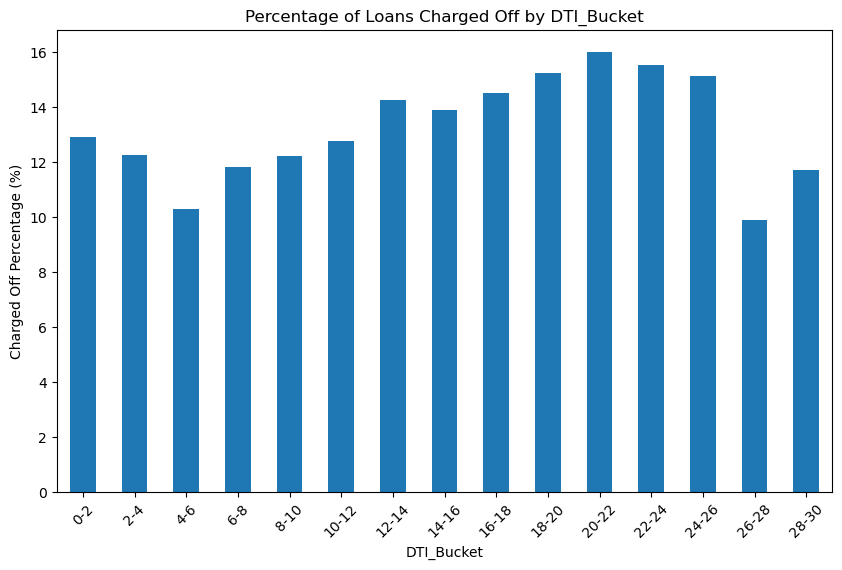

In [341]:
# Understanding the relationship between loan_status and DTI
# Create a pivot table to calculate total loans by dti_bucket
total_loans = pd.pivot_table(
    data=loan_data,
    index='dti_bucket',
    values='id',
    aggfunc='count'
).rename(columns={'id': 'total_loans'})

# Create a pivot table to calculate charged off loans by annual_inc_bucket
charged_off_loans = pd.pivot_table(
    data=loan_data[loan_data['loan_status'] == 'Charged Off'],
    index='dti_bucket',
    values='id',
    aggfunc='count'
).rename(columns={'id': 'charged_off_loans'})

# Combine the two tables
percentage_pivot = charged_off_loans.join(total_loans)

# Calculate the percentage of charged off loans
percentage_pivot['charged_off_percentage'] = (
    (percentage_pivot['charged_off_loans'] / percentage_pivot['total_loans']) * 100
).round(2)

# Display the Pivot Table
print(percentage_pivot)

# Visualize the results
plt.figure(figsize=(10, 6))
percentage_pivot['charged_off_percentage'].plot(kind='bar')
plt.title('Percentage of Loans Charged Off by DTI_Bucket')
plt.xlabel('DTI_Bucket')
plt.ylabel('Charged Off Percentage (%)')
plt.xticks(rotation=45)
plt.show()

In [343]:
# Finding # 11
# Charged off loans as a percentage of Total Loans is shows an increase as the DTI increases
# The increase starts from bucket '4-6' and peaks in the DTI bucket of '20-22' and the gradually tapering down again

             charged_off_loans  total_loans  charged_off_percentage
delinq_2yrs                                                        
0                         3909        28905                   13.52
1                          375         2633                   14.24
2                           92          532                   17.29
3                           24          177                   13.56
4                           11           46                   23.91
5                            2           17                   11.76
6                            1           10                   10.00
7                            1            4                   25.00
8                            1            2                   50.00


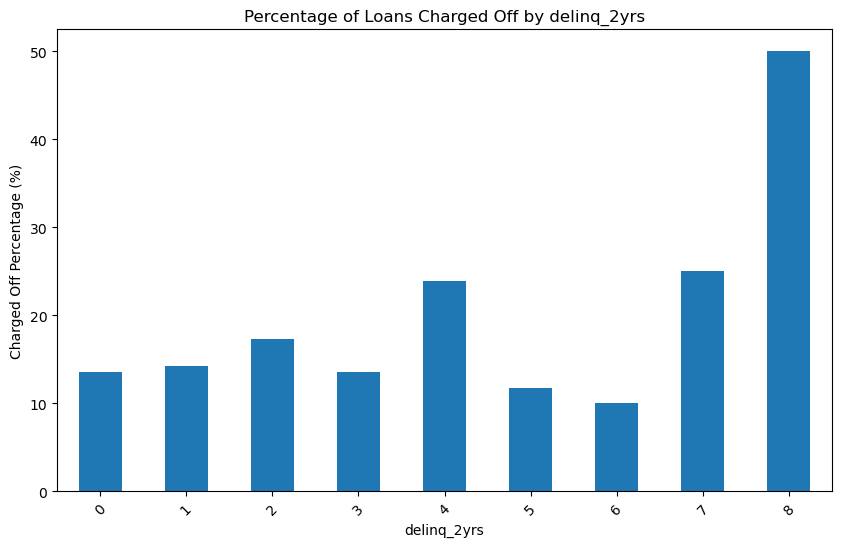

In [345]:
# Relationship between loan_status and delinq_2yrs
# Create a pivot table to calculate total loans by delinq_2yrs
total_loans = pd.pivot_table(
    data=loan_data,
    index='delinq_2yrs',
    values='id',
    aggfunc='count'
).rename(columns={'id': 'total_loans'})

# Create a pivot table to calculate charged off loans by annual_inc_bucket
charged_off_loans = pd.pivot_table(
    data=loan_data[loan_data['loan_status'] == 'Charged Off'],
    index='delinq_2yrs',
    values='id',
    aggfunc='count'
).rename(columns={'id': 'charged_off_loans'})

# Combine the two tables
percentage_pivot = charged_off_loans.join(total_loans)

# Calculate the percentage of charged off loans
percentage_pivot['charged_off_percentage'] = (
    (percentage_pivot['charged_off_loans'] / percentage_pivot['total_loans']) * 100
).round(2)

# Display the Pivot Table
print(percentage_pivot)

# Visualize the results
plt.figure(figsize=(10, 6))
percentage_pivot['charged_off_percentage'].plot(kind='bar')
plt.title('Percentage of Loans Charged Off by delinq_2yrs')
plt.xlabel('delinq_2yrs')
plt.ylabel('Charged Off Percentage (%)')
plt.xticks(rotation=45)
plt.show()

In [347]:
# Finding # 12
# Chanrged off Loans as a percentage goes up significantly as
    # The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years exceeds 7

                charged_off_loans  total_loans  charged_off_percentage
inq_last_6mths                                                        
0                            1806        15797                   11.43
1                            1334         8964                   14.88
2                             733         4726                   15.51
3                             481         2423                   19.85
4                              27          238                   11.34
5                              16          102                   15.69
6                              10           40                   25.00
7                               7           28                   25.00
8                               2            9                   22.22


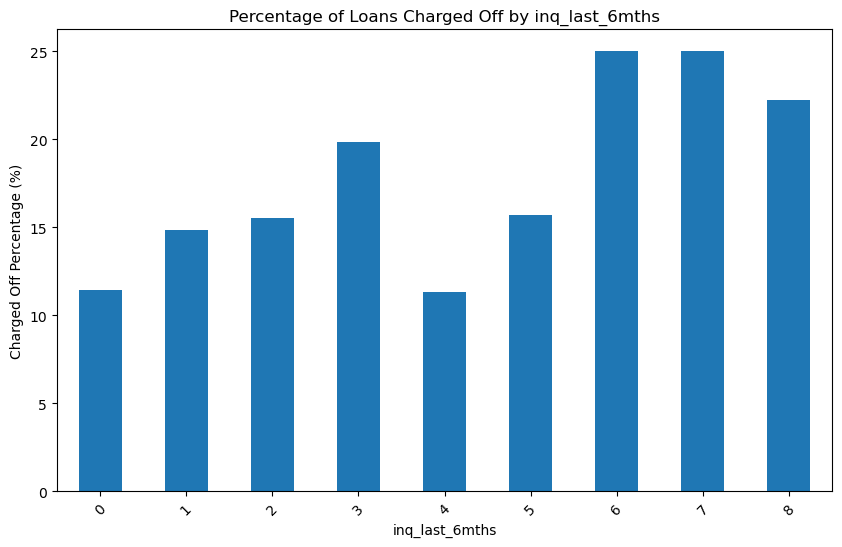

In [349]:
# Relationship between loan_status and inq_last_6mths
# Create a pivot table to calculate total loans by inq_last_6mths
total_loans = pd.pivot_table(
    data=loan_data,
    index='inq_last_6mths',
    values='id',
    aggfunc='count'
).rename(columns={'id': 'total_loans'})

# Create a pivot table to calculate charged off loans by annual_inc_bucket
charged_off_loans = pd.pivot_table(
    data=loan_data[loan_data['loan_status'] == 'Charged Off'],
    index='inq_last_6mths',
    values='id',
    aggfunc='count'
).rename(columns={'id': 'charged_off_loans'})

# Combine the two tables
percentage_pivot = charged_off_loans.join(total_loans)

# Calculate the percentage of charged off loans
percentage_pivot['charged_off_percentage'] = (
    (percentage_pivot['charged_off_loans'] / percentage_pivot['total_loans']) * 100
).round(2)

# Display the Pivot Table
print(percentage_pivot)

# Visualize the results
plt.figure(figsize=(10, 6))
percentage_pivot['charged_off_percentage'].plot(kind='bar')
plt.title('Percentage of Loans Charged Off by inq_last_6mths')
plt.xlabel('inq_last_6mths')
plt.ylabel('Charged Off Percentage (%)')
plt.xticks(rotation=45)
plt.show()

In [353]:
# Finding # 13
# Chanrged off Loans as a percentage goes up significantly as
    # The number of inquiries in past 6 months (excluding auto and mortgage inquiries) exceeds 5

          charged_off_loans  total_loans  charged_off_percentage
open_acc                                                        
2                        91          466                   19.53
3                       205         1262                   16.24
4                       284         1965                   14.45
5                       341         2702                   12.62
6                       441         3352                   13.16
7                       440         3372                   13.05
8                       443         3266                   13.56
9                       401         3054                   13.13
10                      376         2590                   14.52
11                      306         2201                   13.90
12                      231         1827                   12.64
13                      203         1489                   13.63
14                      174         1169                   14.88
15                      1

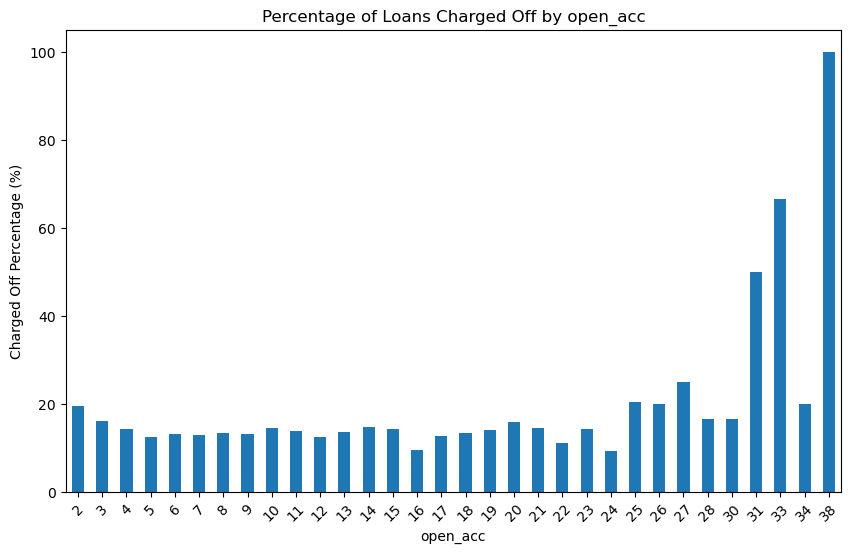

In [355]:
# Relationship between loan_status and open_acc
# Create a pivot table to calculate total loans by open_acc
total_loans = pd.pivot_table(
    data=loan_data,
    index='open_acc',
    values='id',
    aggfunc='count'
).rename(columns={'id': 'total_loans'})

# Create a pivot table to calculate charged off loans by annual_inc_bucket
charged_off_loans = pd.pivot_table(
    data=loan_data[loan_data['loan_status'] == 'Charged Off'],
    index='open_acc',
    values='id',
    aggfunc='count'
).rename(columns={'id': 'charged_off_loans'})

# Combine the two tables
percentage_pivot = charged_off_loans.join(total_loans)

# Calculate the percentage of charged off loans
percentage_pivot['charged_off_percentage'] = (
    (percentage_pivot['charged_off_loans'] / percentage_pivot['total_loans']) * 100
).round(2)

# Display the Pivot Table
print(percentage_pivot)

# Visualize the results
plt.figure(figsize=(10, 6))
percentage_pivot['charged_off_percentage'].plot(kind='bar')
plt.title('Percentage of Loans Charged Off by open_acc')
plt.xlabel('open_acc')
plt.ylabel('Charged Off Percentage (%)')
plt.xticks(rotation=45)
plt.show()

In [357]:
# Finding # 13
# Not really a very strong relationship but - 
    # Chanrged off Loans as a percentage goes up significantly as
        # The number of open credit lines in the borrower's credit file exceeds 30

         charged_off_loans  total_loans  charged_off_percentage
pub_rec                                                        
0                     4048        30573                   13.24
1                      358         1702                   21.03
2                       10           45                   22.22


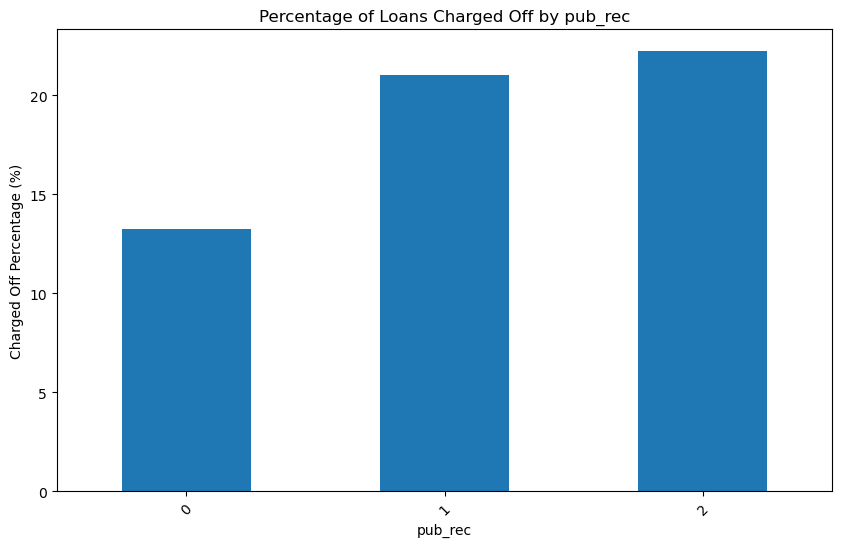

In [359]:
# Relationship between loan_status and pub_rec
# Create a pivot table to calculate total loans by pub_rec
total_loans = pd.pivot_table(
    data=loan_data,
    index='pub_rec',
    values='id',
    aggfunc='count'
).rename(columns={'id': 'total_loans'})

# Create a pivot table to calculate charged off loans by annual_inc_bucket
charged_off_loans = pd.pivot_table(
    data=loan_data[loan_data['loan_status'] == 'Charged Off'],
    index='pub_rec',
    values='id',
    aggfunc='count'
).rename(columns={'id': 'charged_off_loans'})

# Combine the two tables
percentage_pivot = charged_off_loans.join(total_loans)

# Calculate the percentage of charged off loans
percentage_pivot['charged_off_percentage'] = (
    (percentage_pivot['charged_off_loans'] / percentage_pivot['total_loans']) * 100
).round(2)

# Display the Pivot Table
print(percentage_pivot)

# Visualize the results
plt.figure(figsize=(10, 6))
percentage_pivot['charged_off_percentage'].plot(kind='bar')
plt.title('Percentage of Loans Charged Off by pub_rec')
plt.xlabel('pub_rec')
plt.ylabel('Charged Off Percentage (%)')
plt.xticks(rotation=45)
plt.show()

In [361]:
# Finding # 14
    # Chanrged off Loans as a percentage goes up significantly as
        # The number of derogatory public records is more than '0' and goes up as we increase from '1' to '2'

                      charged_off_loans  total_loans  charged_off_percentage
pub_rec_bankruptcies                                                        
0.00                               4129        30935                   13.35
1.00                                285         1386                   20.56
2.00                                  2            6                   33.33


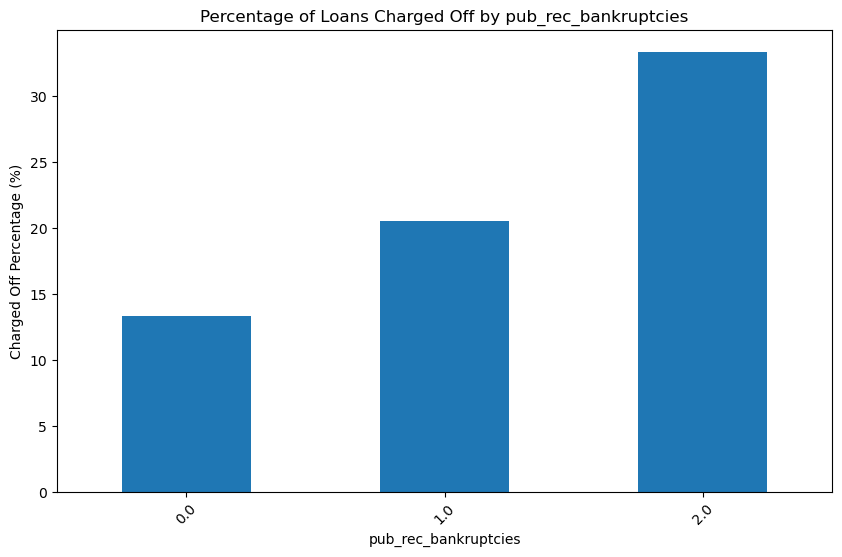

In [363]:
# Relationship between loan_status and pub_rec_bankruptcies
# Create a pivot table to calculate total loans by pub_rec_bankruptcies
total_loans = pd.pivot_table(
    data=loan_data,
    index='pub_rec_bankruptcies',
    values='id',
    aggfunc='count'
).rename(columns={'id': 'total_loans'})

# Create a pivot table to calculate charged off loans by annual_inc_bucket
charged_off_loans = pd.pivot_table(
    data=loan_data[loan_data['loan_status'] == 'Charged Off'],
    index='pub_rec_bankruptcies',
    values='id',
    aggfunc='count'
).rename(columns={'id': 'charged_off_loans'})

# Combine the two tables
percentage_pivot = charged_off_loans.join(total_loans)

# Calculate the percentage of charged off loans
percentage_pivot['charged_off_percentage'] = (
    (percentage_pivot['charged_off_loans'] / percentage_pivot['total_loans']) * 100
).round(2)

# Display the Pivot Table
print(percentage_pivot)

# Visualize the results
plt.figure(figsize=(10, 6))
percentage_pivot['charged_off_percentage'].plot(kind='bar')
plt.title('Percentage of Loans Charged Off by pub_rec_bankruptcies')
plt.xlabel('pub_rec_bankruptcies')
plt.ylabel('Charged Off Percentage (%)')
plt.xticks(rotation=45)
plt.show()

In [365]:
# Finding # 15
    # Chanrged off Loans as a percentage goes up significantly as
        # The number of public record bankruptcies increases significantly as it increases from 0' to '1' and then again to '2'

                  charged_off_loans  total_loans  charged_off_percentage
application_type                                                        
INDIVIDUAL                     4416        32327                   13.66


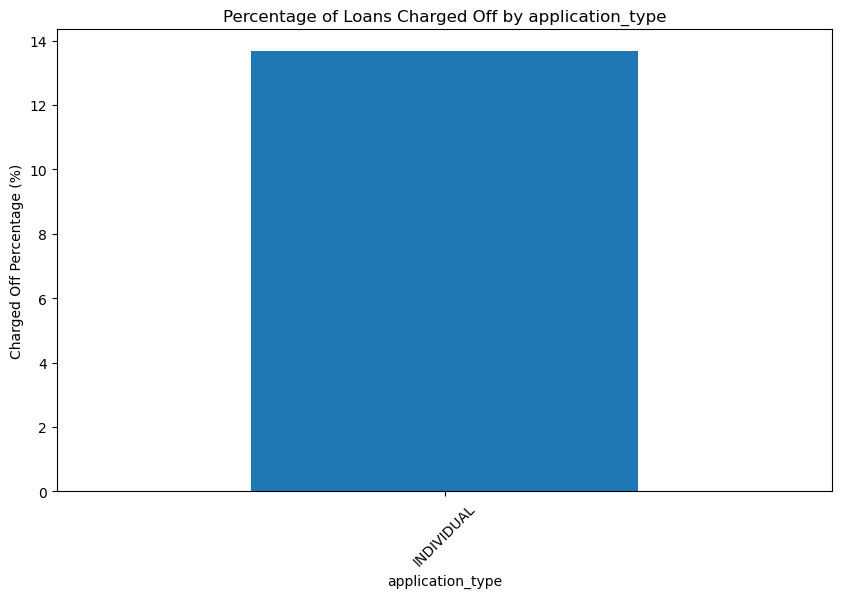

In [367]:
# Relationship between loan_status and application_type
# Create a pivot table to calculate total loans by application_type
total_loans = pd.pivot_table(
    data=loan_data,
    index='application_type',
    values='id',
    aggfunc='count'
).rename(columns={'id': 'total_loans'})

# Create a pivot table to calculate charged off loans by application_type
charged_off_loans = pd.pivot_table(
    data=loan_data[loan_data['loan_status'] == 'Charged Off'],
    index='application_type',
    values='id',
    aggfunc='count'
).rename(columns={'id': 'charged_off_loans'})

# Combine the two tables
percentage_pivot = charged_off_loans.join(total_loans)

# Calculate the percentage of charged off loans
percentage_pivot['charged_off_percentage'] = (
    (percentage_pivot['charged_off_loans'] / percentage_pivot['total_loans']) * 100
).round(2)

# Display the Pivot Table
print(percentage_pivot)

# Visualize the results
plt.figure(figsize=(10, 6))
percentage_pivot['charged_off_percentage'].plot(kind='bar')
plt.title('Percentage of Loans Charged Off by application_type')
plt.xlabel('application_type')
plt.ylabel('Charged Off Percentage (%)')
plt.xticks(rotation=45)
plt.show()

In [369]:
# Finding # 15
    # All the application types are from "individuals" and hence not trend or relationship is visible here.

In [89]:
loan_data.annual_inc.head()

0    24000.0
1    30000.0
2    12252.0
3    49200.0
4    80000.0
Name: annual_inc, dtype: float64

In [101]:
loan_data.annual_inc.value_counts()

annual_inc
60000.0    1505
50000.0    1057
40000.0     876
45000.0     830
30000.0     825
           ... 
56820.0       1
45314.0       1
53913.0       1
62880.0       1
27376.0       1
Name: count, Length: 5318, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

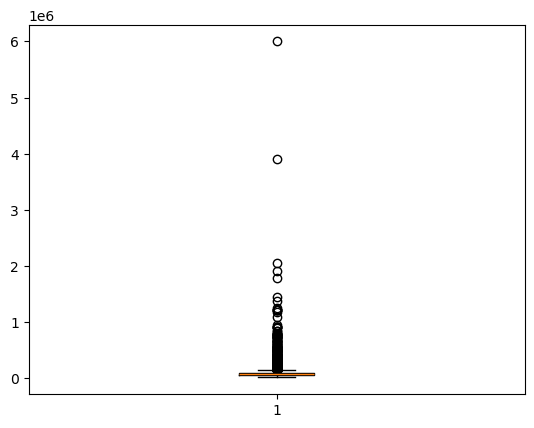

In [99]:
#checking for outliers in annual_inc
plt.boxplot(loan_data.annual_inc)
plt.show

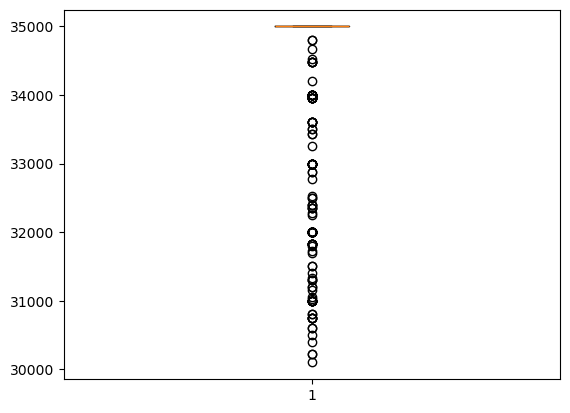

In [105]:
plt.boxplot(loan_data.loan_amnt[loan_data.loan_amnt>30000])
plt.show()